In [ ]:
!pip install yahoo_fin

     |████████████████████████████████| 81 kB 3.4 MB/s 
     |████████████████████████████████| 83 kB 965 kB/s 
     |████████████████████████████████| 112 kB 40.0 MB/s 
     |████████████████████████████████| 127 kB 47.5 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=63a6d5300a1a2a4578760d21344a4ed7c6a2b051bef712a9416147bdf054783b
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=e66824a59113f648b8123d86996944226fee25f88975ea0b88c0862f7a8ae90f
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=31668bb58bcc4140ff93716f0e24894c93dab2f7d81a55164fbfab4707fa1400
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

In [ ]:
import yahoo_fin.stock_info as si
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta
import plotly.express as px
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [24, 8]

In [ ]:
nasdaq_list = ["MMM","AXP","AMGN","AAPL","BA","CAT","CVX","CSCO","KO","DOW","GS","HD","HON","IBM","INTC","JNJ",
               "JPM","MCD","MRK","MSFT","NKE","PG","CRM","TRV","UNH","VZ","V","WBA","WMT","DIS"]  # si.tickers_nasdaq()
index = 0
for symbol in nasdaq_list:
  past_date = date.today() + relativedelta(months=-12)
  past_date_yyyy_mm_dd = past_date.strftime('%Y-%m-%d')

  past_date_month_after = date.today() + relativedelta(months=0)
  past_date_yyyy_mm_dd_month_after = past_date_month_after.strftime('%Y-%m-%d')
  hist_data = si.get_data(symbol, start_date=past_date_yyyy_mm_dd, end_date=past_date_yyyy_mm_dd_month_after)
  temp_df = hist_data.drop(['open', 'high', 'low', 'adjclose', 'volume', 'ticker'], axis = 1)

  temp_df['percentage'] = np.where(temp_df['close'] > temp_df['close'].shift(1), ((temp_df['close']-temp_df['close'].shift(1)) / temp_df['close'].shift(1))*100, ((temp_df['close']-temp_df['close'].shift(1)) / temp_df['close'].shift(1))*100)
  temp_df = temp_df.rename({'percentage': symbol}, axis=1)
  temp_df = temp_df.drop(['close'], axis = 1)
  if index > 0:
    result_df = pd.merge(result_df, temp_df, left_index=True, right_index=True)
  else:
    result_df = temp_df
  index = index + 1

def interactive_plot(df, title):
  fig = px.line(title = title)

  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[:]:
    fig.add_scatter(x = df.index, y = df[i], name = i) # add a new Scatter trace

  fig.show()

interactive_plot(result_df, 'Percentage movement comapred to previous day')


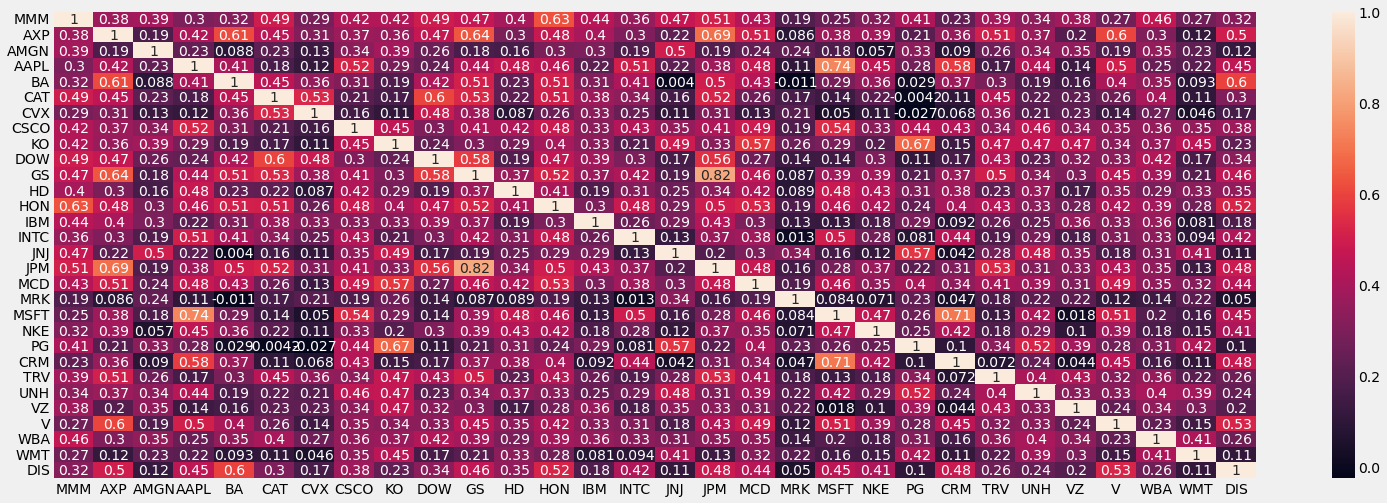

In [ ]:
#CORRELATIONS
correlation = result_df.corr()
ax = plt.subplot()
sns.heatmap(correlation, annot = True, ax = ax);

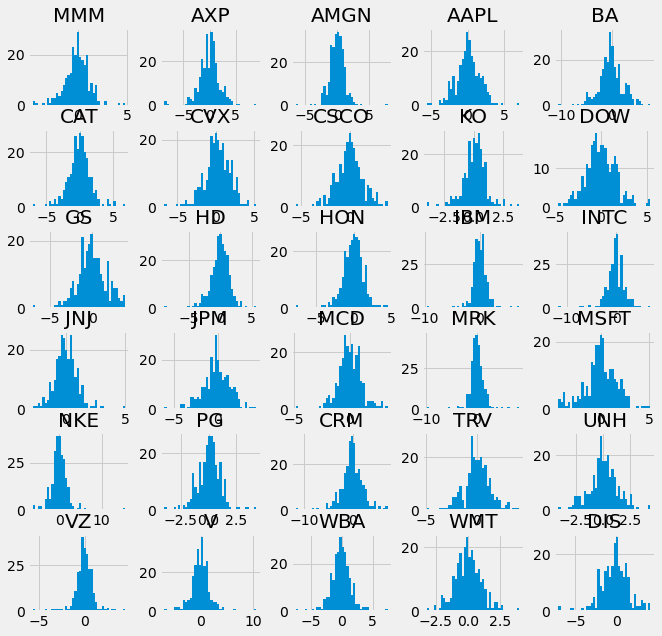

In [ ]:
result_df.hist(figsize=(10, 10), bins = 40);